##### If you're interested in the deeper mathematics of linear regession methods, check out the [wikipedia page](http://en.wikipedia.org/wiki/Linear_regression) and also check out Andrew Ng's wonderful lectures for free on [youtube](https://www.youtube.com/watch?v=5u4G23_OohI). 

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [10]:
# Step 1: Getting and Setting up the data
from sklearn.datasets import load_boston

In [11]:
boston = load_boston()

In [12]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0.5, 0, 'Number of Houses')

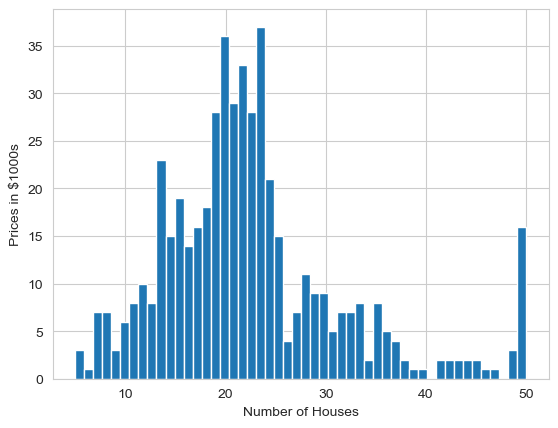

In [17]:
# Step 2: Visualizing current data
plt.hist(boston.target, bins=50)
plt.ylabel('Prices in $1000s')
plt.xlabel('Number of Houses')

Text(0.5, 0, 'Number of rooms')

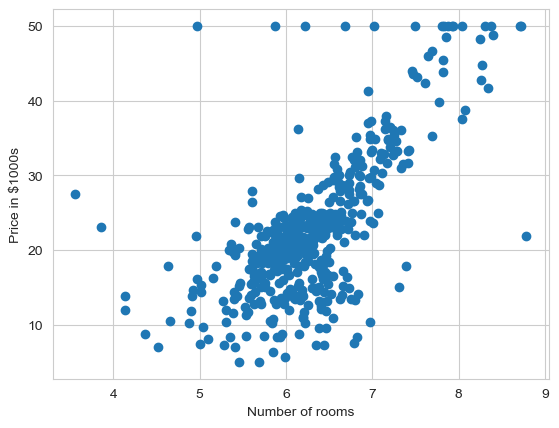

In [18]:
# Scatter plot of one feature versus the target
# RM number of rooms per dwelling
plt.scatter(x=boston.data[:,5], y=boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [19]:
boston_df = DataFrame(boston.data)
# built in for convenience bc its embedded in scikit learn
boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


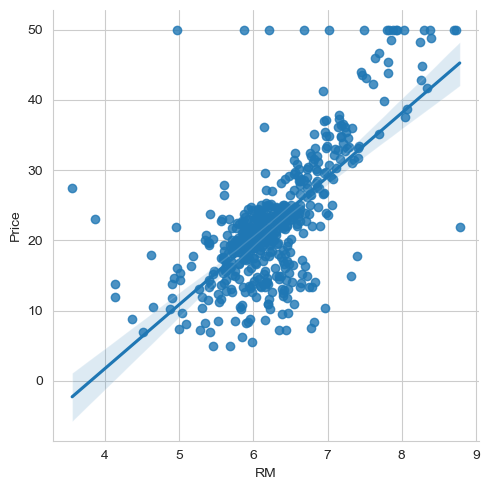

In [24]:
sns.lmplot(x='RM', y='Price', data=boston_df)
# for a simple linear fit you can keep to seaborns, this won't work as well with more complicated regression models

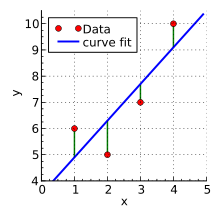

In [25]:
# Step 3: the mathematics behind the Least Squares Method
# Quick display of image from wikipedia, to understand Best Fit Line
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

If you want further informatino on the mathematics of the above formulas, check out this great [video](https://www.youtube.com/watch?v=Qa2APhWjQPc).

In [30]:
# Step 4: Using Numpy for a Univariate Linear Regression
X = boston_df.RM
X.shape
# NOTE: For numpy's linear alebra library it expects x to be 2-dimensional

(506,)

In [47]:
X = np.vstack([boston_df.RM,np.ones(len(boston_df.RM))]).T
X.shape

(506, 2)

In [32]:
Y = boston_df.Price

Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.
 
We know that a line has the equation:
 $$y=mx+b$$
which we can rewrite using matrices:
 $$y=Ap$$
where:
 $$A = \begin{bmatrix}x & 1\end{bmatrix}$$
 and
 $$p= \begin{bmatrix}m \\b\end{bmatrix}$$
 
This is the same as the first equation if you carry out the linear algebra. 
So we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [50]:
# Using numpys linear algebra's least squares method
m , b = np.linalg.lstsq(X,Y,rcond=None)[0]
print(m,b)

9.102108981180315 -34.67062077643857


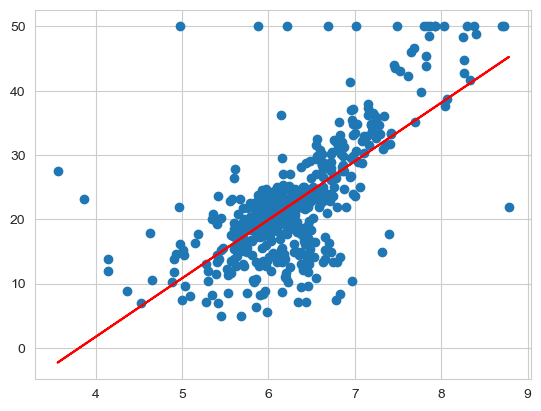

In [56]:
plt.scatter(boston_df.RM, boston_df.Price, marker='o')
x = boston_df.RM

plt.plot(x, m*x + b, 'r', label='Best Fit Line')

In [58]:
# Step 5: Finding the error
result = np.linalg.lstsq(X,Y,rcond=None)
error_total = result[1]
# Root mean squared error
rmse = np.sqrt(error_total/len(X))

print('The root mean squared error was %.2f' %rmse)

The root mean squared error was 6.60


Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time. Note: Review the Normal Distribution Appendix lecture if this doesn't make sense to you or check out this [link](http://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule).

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

In [59]:
# Step 6: Using scikit learn to implement a multivariate regression
import sklearn
from sklearn.linear_model import LinearRegression

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!
 
We'll start by importing the [linear regression library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the sklearn module.
 
The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [60]:
# Create a LinearRegression object
lreg = LinearRegression()

The functions we will be using are:
 
lreg.fit() which fits a linear model
 
lreg.predict() which is used to predict Y using the linear model with estimated coefficients
 
lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, learn more about it [here](http://en.wikipedia.org/wiki/Coefficient_of_determination)
 

We'll start the multi variable regression analysis by seperating our boston dataframe into the data columns and the target columns:

In [67]:
# splitting data columns from target column
X_multi = boston_df.drop(labels='Price',axis=1)

Y_target = boston_df.Price

In [68]:
lreg.fit(X_multi, Y_target)

LinearRegression()

In [71]:
print('The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print('The number of coefficients used was %d ' %len(lreg.coef_))

The estimated intercept coefficient is 36.46 
The number of coefficients used was 13 


Great! So we have basically made an equation for a line, but instead of just one coefficient m and and intercept b, we now have 13 coefficients. To get an idea of what this looks like check out the [documentation](http://scikit-learn.org/stable/modules/linear_model.html) for this equation:
 $$ y(w,x) = w_0 + w_1 x_1 + ... + w_p x_p $$
 
 Where $$w = (w_1, ...w_p)$$ as the coefficients and $$ w_0 $$ as the intercept 

 What we'll do next is set up a DataFrame showing all the Features and their estimated coefficients obtained form the linear regression.


In [72]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [74]:
# Grab the output and set X and Y, test and train data sets!
# Can see documentationt o 
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, boston_df.Price)

You can learn more about these parameters for train_test_split [here](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [75]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [77]:
# Use training set for prediction, and testing set for validation of that prediction
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression()

In [78]:
# Run a prediction on the X training set and the testing set (Hopefully the numbers are pretty close)
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [81]:
# Take the mean squared error
print('Fit a model X_train, and calculate MSE with Y_train: %.2f' %np.mean((Y_train - pred_train)**2))
print('Fit a model X_train, and calculate MSE with X_test and Y_test: %2f' %np.mean((Y_test - pred_test)**2))

Fit a model X_train, and calculate MSE with Y_train: 47.88
Fit a model X_train, and calculate MSE with X_test and Y_test: 30.947503


In [82]:
# Step 9 : Residual Plots
# Is there a way to visualize how close the testing and training set?
# Using residual plot

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:
 
 $$Residual = Observed\:value - Predicted\:value $$

 You can think of these residuals in the same way as the D value we discussed earlier, in this case however, there were multiple data points considered.

 A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.
 
 Residual plots are a good way to visualize the errors in your data.  If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data, or  fixed effects. If this is the case go back to your model and check your data set closely.
 
 So now let's go ahead and create the residual plot. For more info on the residual plots check out this great [link](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).


Text(0.5, 1.0, 'Residual Plots')

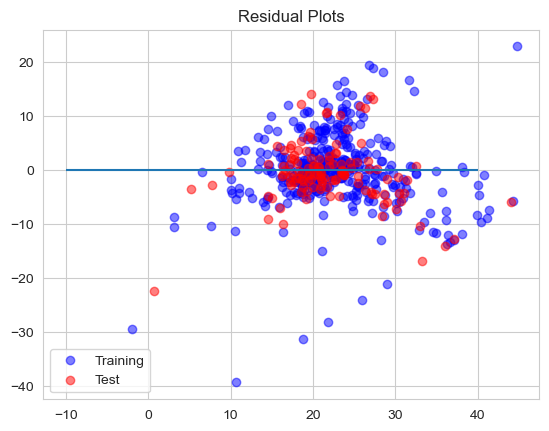

In [85]:
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train - Y_train), c='b', alpha=0.5)
# Scatter plot the testing data
test = plt.scatter(pred_test, (pred_test - Y_test), c='r', alpha=0.5)
# Plot a horizontal line at 0
plt.hlines(y=0, xmin=-10, xmax=40)
# labels
plt.legend((train, test),('Training', 'Test'), loc='lower left')
plt.title('Residual Plots')